In [1]:
from data import *
import matplotlib.pyplot as plt
%matplotlib inline
from loss import *

from torch import nn
from torch.autograd import Variable
from train import *


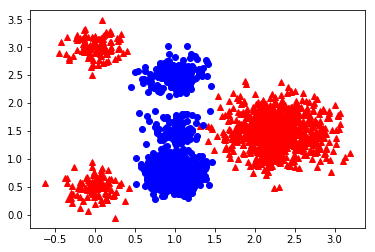

In [2]:
# create training data 
p = pos()
n = neg()
XY,x,y = getXY(p,n)
plot(p,n)

In [60]:
AUCPRLoss(11,0.25,0.75).a



 0.2500
 0.3000
 0.3500
 0.4000
 0.4500
 0.5000
 0.5500
 0.6000
 0.6500
 0.7000
 0.7500
[torch.FloatTensor of size 11]

In [55]:
trainl(f, criterion, x, y, lr=0.01)


26.28546714782715
3.4106476306915283
2.838434934616089
2.553506374359131
2.4690287113189697
2.4524972438812256
2.4490857124328613
2.4478421211242676
2.446960926055908
2.4464564323425293
2.446110248565674
2.4458634853363037
2.4457497596740723
2.445742130279541
2.445810317993164
2.445963144302368
2.4461965560913086
2.4464969635009766
2.4468815326690674
2.4473421573638916
2.4478540420532227
2.448410987854004
2.448997974395752
2.4496006965637207
2.450206756591797
2.450798988342285
2.4513652324676514
2.4518978595733643
2.4523825645446777
2.4528121948242188
2.4531986713409424
2.453552722930908
2.453853130340576
2.454105854034424
2.45432448387146
2.454516649246216
2.4546756744384766
2.454813003540039
2.4549481868743896
2.4551174640655518
2.4553234577178955
2.4555416107177734
2.4557833671569824
2.4560394287109375
2.4563143253326416
2.4566168785095215
2.456937551498413
2.4572696685791016
2.4576125144958496
2.4579639434814453
2.4583146572113037
2.458667039871216
2.4590165615081787
2.459365367889

In [61]:
num_epochs = 600
learning_rate = 0.1
f = nn.Sequential(nn.Linear(2,1,bias=False))#, nn.Tanh())
#criterion = RatPLoss(a, 1)
criterion = AUCPRLoss(11,0.25,0.75)
#train(f, criterion, x, y, lr=0.01)
trainl(f, criterion, x, y, lr=0.01)
trainl(f, criterion, x, y, lr=0.01)
trainl(f, criterion, x, y, lr=0.01)

#plotf(p,n,f[0])

15.352365493774414
1.5822339057922363
2.4549059867858887
3.2687604427337646
4.000411033630371
4.61585807800293
5.080482482910156
5.362378120422363
5.445362567901611
5.341001033782959
5.180160999298096
4.962162017822266
4.720788478851318
4.50971794128418
4.347061634063721
4.233180999755859
4.158954620361328
4.1088666915893555
4.07383918762207
4.04371452331543
4.012357234954834
3.979281425476074
3.947718620300293
3.9173784255981445
3.8870253562927246
3.852426528930664
3.811326742172241
3.7648839950561523
3.7176320552825928
3.677147388458252
3.6455235481262207
3.624521255493164
3.6110329627990723
3.601583957672119
3.5938503742218018
3.58658766746521
3.579227924346924
3.5714621543884277
3.5637807846069336
3.556426763534546
3.549551486968994
3.544285297393799
3.541949510574341
3.542208433151245
3.544558525085449
3.549184560775757
3.5559794902801514
3.5642757415771484
3.5739212036132812
3.5845625400543213
3.5959157943725586
3.607517719268799
3.61918306350708
3.630915641784668
3.6424996852874

In [64]:
f[0].bias = nn.Parameter(torch.Tensor([0]))

In [62]:
criterion.b

[Parameter containing:
 -0.7546
 [torch.FloatTensor of size 1], Parameter containing:
 -1.6842
 [torch.FloatTensor of size 1], Parameter containing:
 -2.0891
 [torch.FloatTensor of size 1], Parameter containing:
 -2.3510
 [torch.FloatTensor of size 1], Parameter containing:
 -2.5356
 [torch.FloatTensor of size 1], Parameter containing:
 -2.6894
 [torch.FloatTensor of size 1], Parameter containing:
 -2.8558
 [torch.FloatTensor of size 1], Parameter containing:
 -2.9714
 [torch.FloatTensor of size 1], Parameter containing:
 -3.0521
 [torch.FloatTensor of size 1], Parameter containing:
 -3.1209
 [torch.FloatTensor of size 1], Parameter containing:
 -3.1746
 [torch.FloatTensor of size 1]]

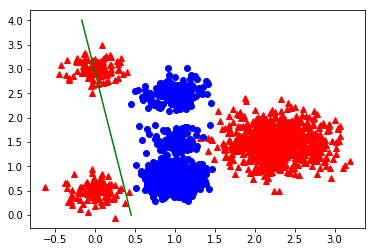

In [72]:
f[0].bias.data[0] = criterion.b[0].data[0]
#f[0].bias.data[0] = -7
plotf(p,n,f[0])

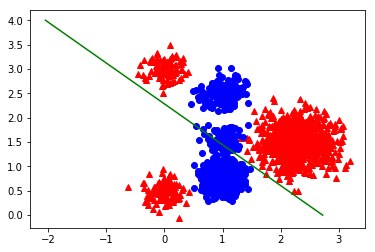

In [34]:
f[0].bias.data[0] = criterion.b[1].data[0]
#f[0].bias.data[0] = -7
plotf(p,n,f[0])

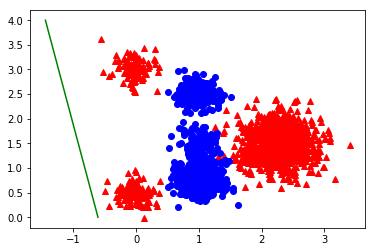

In [12]:
f[0].bias.data[0] = 1
plotf(p,n,f[0])

In [22]:
PP = []
RR = []
for c in torch.linspace(-7,1,100):
    f[0].bias.data[0] = c
    PP.append(P(f(x),y).data[0])
    RR.append(R(f(x),y).data[0])
    

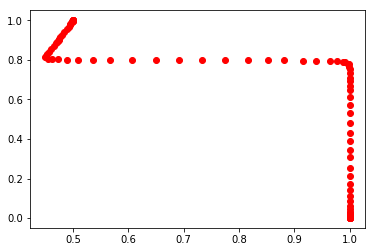

In [24]:
plt.plot(torch.Tensor(PP).clamp(0,1).numpy(),torch.Tensor(RR).clamp(0,1).numpy(),'ro')